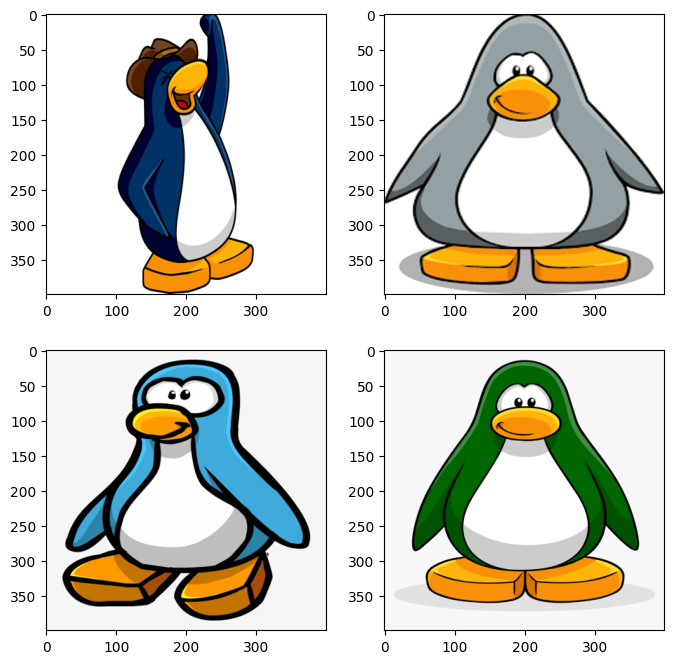

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

p1_img = np.array(Image.open('P1.png').resize((400,400)))[:, :, :3]
p2_img = np.array(Image.open('P2.png').convert('RGB').resize((400,400)))[:, :, :3]
p3_img = np.array(Image.open('P3.jpg').resize((400,400)))[:, :, :3]
p4_img = np.array(Image.open('P4.png').resize((400,400)))[:, :, :3]

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(p1_img)
plt.subplot(2,2,2)
plt.imshow(p2_img)
plt.subplot(2,2,3)
plt.imshow(p3_img)
plt.subplot(2,2,4)
plt.imshow(p4_img)

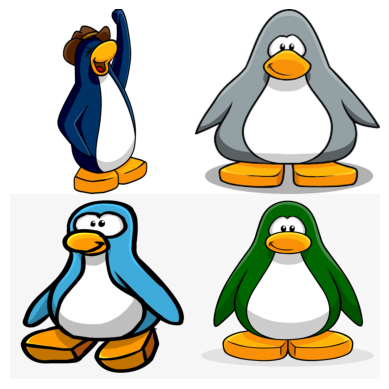

In [30]:
linha_topo = np.hstack((p1_img, p2_img))
linha_baixo = np.hstack((p3_img, p4_img))
final = np.vstack((linha_topo, linha_baixo))


plt.imshow(final)
plt.show()

C:\Users\Victor\AppData\Local\Temp\ipykernel_15764\217705826.py:17: RuntimeWarning: invalid value encountered in divide
  h[mask & (c_max == r) & (g >= b)] = (60 * ((g - b) / delta))[mask & (c_max == r) & (g >= b)]
C:\Users\Victor\AppData\Local\Temp\ipykernel_15764\217705826.py:18: RuntimeWarning: invalid value encountered in divide
  h[mask & (c_max == r) & (g < b)] = (60 * ((g - b) / delta) + 360)[mask & (c_max == r) & (g < b)]
C:\Users\Victor\AppData\Local\Temp\ipykernel_15764\217705826.py:19: RuntimeWarning: invalid value encountered in divide
  h[mask & (c_max == g)] = (60 * ((b - r) / delta) + 120)[mask & (c_max == g)]
C:\Users\Victor\AppData\Local\Temp\ipykernel_15764\217705826.py:20: RuntimeWarning: invalid value encountered in divide
  h[mask & (c_max == b)] = (60 * ((r - g) / delta) + 240)[mask & (c_max == b)]


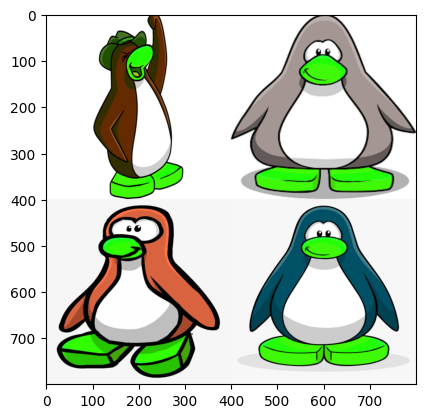

In [50]:
def conversaoHSV(imagem):
    img = np.array(imagem, dtype=np.float32) / 255.0
    
    r = img[..., 0]
    g = img[..., 1]
    b = img[..., 2]
    
    c_max = np.max(img, axis=-1)
    c_min = np.min(img, axis=-1)
    delta = c_max - c_min
    
    h = np.zeros_like(c_max)
    s = np.zeros_like(c_max)
    v = c_max
    
    mask = delta != 0
    h[mask & (c_max == r) & (g >= b)] = (60 * ((g - b) / delta))[mask & (c_max == r) & (g >= b)]
    h[mask & (c_max == r) & (g < b)] = (60 * ((g - b) / delta) + 360)[mask & (c_max == r) & (g < b)]
    h[mask & (c_max == g)] = (60 * ((b - r) / delta) + 120)[mask & (c_max == g)]
    h[mask & (c_max == b)] = (60 * ((r - g) / delta) + 240)[mask & (c_max == b)]
    
    s[c_max != 0] = delta[c_max != 0] / c_max[c_max != 0]
    return np.stack([h, s * 255, v * 255], axis=-1).astype(np.uint8)

def conversaoRGB(hsv_img):
    h = hsv_img[..., 0].astype(np.float32)
    s = hsv_img[..., 1].astype(np.float32) / 255.0
    v = hsv_img[..., 2].astype(np.float32) / 255.0

    c = v * s
    x = c * (1 - np.abs((h / 60) % 2 - 1))
    m = v - c

    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)

    h0 = (h < 60)
    h1 = (h >= 60) & (h < 120)
    h2 = (h >= 120) & (h < 180)
    h3 = (h >= 180) & (h < 240)
    h4 = (h >= 240) & (h < 300)
    h5 = (h >= 300)

    r[h0], g[h0], b[h0] = c[h0], x[h0], 0
    r[h1], g[h1], b[h1] = x[h1], c[h1], 0
    r[h2], g[h2], b[h2] = 0, c[h2], x[h2]
    r[h3], g[h3], b[h3] = 0, x[h3], c[h3]
    r[h4], g[h4], b[h4] = x[h4], 0, c[h4]
    r[h5], g[h5], b[h5] = c[h5], 0, x[h5]

    r = (r + m) * 255
    g = (g + m) * 255
    b = (b + m) * 255

    rgb = np.stack([r, g, b], axis=-1).clip(0, 255).astype(np.uint8)
    return rgb


hsv = conversaoHSV(final)
hsv[..., 0] = (hsv[..., 0] + 30) % 360
rgb_modificado = conversaoRGB(hsv)

plt.imshow(rgb_modificado)
plt.show()

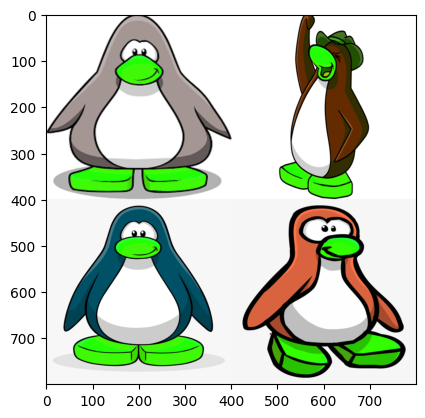

In [51]:
(l, c, p) = rgb_modificado.shape

reflexao = np.zeros(shape=rgb_modificado.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        reflexao[new_y, new_x] = rgb_modificado[i, j]

plt.imshow(reflexao)

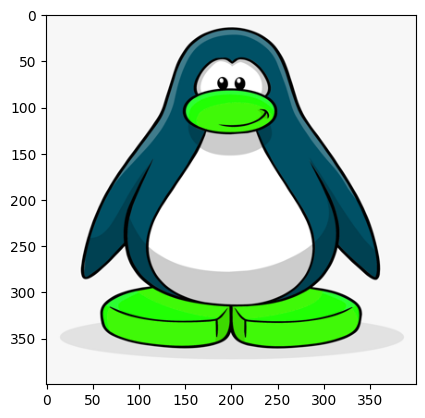

In [49]:
baixo_esquerdo = reflexao[400:800, 0:400]
plt.imshow(baixo_esquerdo)

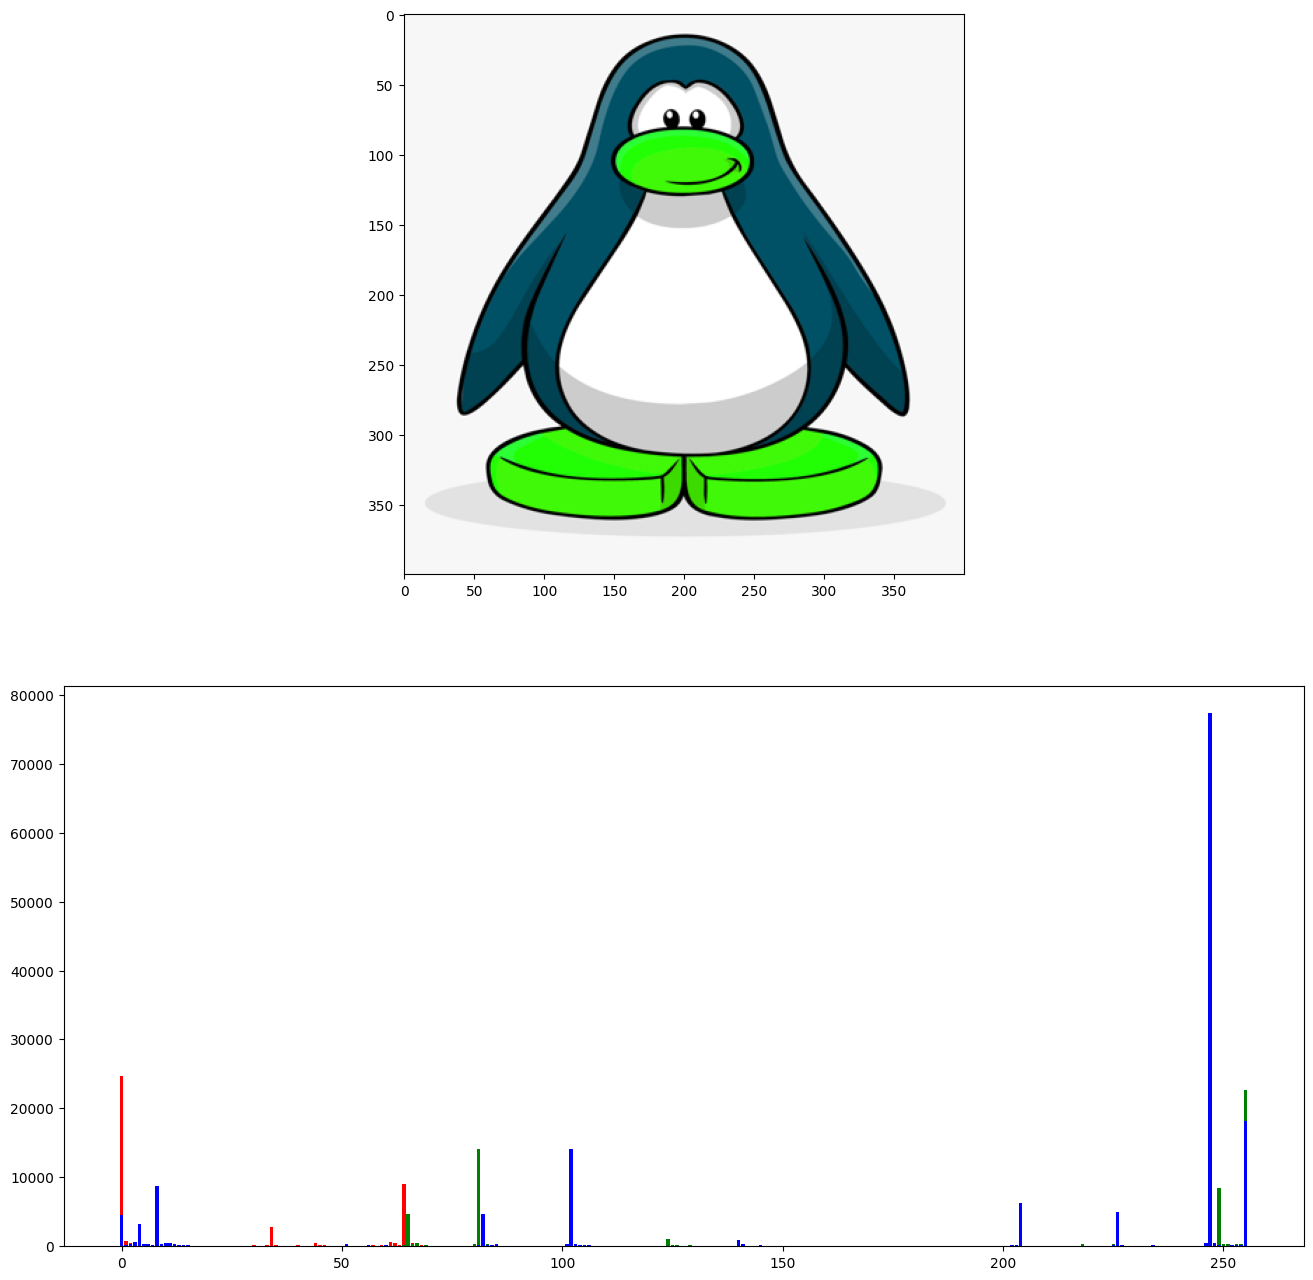

In [52]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

show_histogram(baixo_esquerdo)


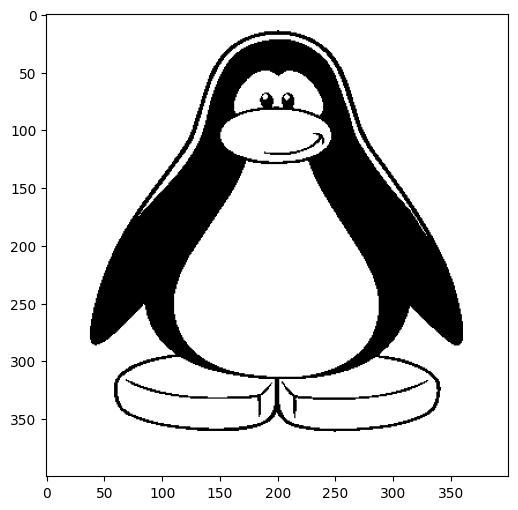

In [84]:
def apply_threshold(gray_img, limiar):
    binary_img = np.zeros_like(gray_img)
    binary_img[gray_img >= limiar] = 255
    return binary_img

def rgb_to_grayscale(img):
    return (0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]).astype(np.uint8)

threshold = 110
gray_img = rgb_to_grayscale(baixo_esquerdo)
thresholded_img = apply_threshold(gray_img, threshold)

plt.figure(figsize=(6, 6))
plt.imshow(thresholded_img, cmap='gray', vmin=0, vmax=255)
plt.show()

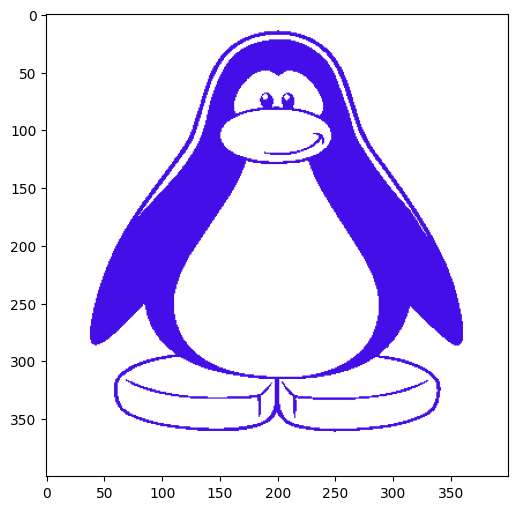

In [85]:
def apply_threshold_with_color(gray_img, limiar, color_below):
    h, w = gray_img.shape
    result_img = np.ones((h, w, 3), dtype=np.uint8) * 255

    mask = gray_img < limiar

    result_img[mask] = color_below

    return result_img

color = [68, 14, 232]

# Convert and apply
thresholded_img = apply_threshold_with_color(gray_img, threshold, color)

# Show result
plt.figure(figsize=(6, 6))
plt.imshow(thresholded_img)
plt.show()